In [5]:
import numpy as np
from math import sin, cos, pi, exp
from scipy.special import erf
from scipy.optimize import root_scalar
from scipy.integrate import quad, solve_ivp
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Kernel, Matern, RBF
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
class FunctionPDE:
    def __init__(self):
        self.evals = 0
    
    def reset(self, reset_params=True):
        self.evals = 0
    
    def __call__(self, t, phi):
        self.evals += 1
        return np.zeros(phi.shape)

    def solve(self, t_0, phi_0, t_1, t_eval=None):
        return phi_0

class HeatEquation(FunctionPDE):
    """Heat equation in 1D"""
    def __init__(self, alpha=1.0, L=1.0, Nx=100, T=0.01, dx=0.01, dt=0.0001):
        """
        Parameters
        ----------
        alpha : float, optional
            Thermal diffusivity.
        L : float, optional
            Length of the rod.
        Nx : int, optional
            Number of spatial steps.
        T : float, optional
            Total time.
        dx : float, optional
            Spatial step size.
        dt : float, optional
            Time step size.
        """
        super().__init__()
        self.alpha = alpha
        self.L = L
        self.Nx = Nx
        self.T = T
        self.dx = dx
        self.dt = dt
        self.x = np.linspace(0, L, Nx)
        self.u = np.zeros(Nx)  # Initial condition

    def reset(self, reset_params=True):
        self.evals = 0
        self.u = np.zeros(self.Nx)  # Reset initial condition

    def __call__(self, t, phi):
        """
        Computes the next state of the system at time t.

        Parameters
        ----------
        t : float
            Time.
        phi : np.ndarray
            Current state.

        Returns
        -------
        np.ndarray
            Updated state after one time step.
        """
        self.evals += 1
        u_new = np.zeros(self.Nx)
        for i in range(1, self.Nx - 1):
            u_new[i] = phi[i] + self.alpha * self.dt / (self.dx**2) * (phi[i+1] - 2*phi[i] + phi[i-1])
        return u_new

    def solve(self, t_0, phi_0, t_1, t_eval=None):
        """
        Solve the PDE from time t_0 to t_1 using the specified integrator.

        Parameters
        ----------
        t_0 : float
            Start time.
        phi_0 : np.ndarray
            Initial state.
        t_1 : float
            End time.
        t_eval : np.ndarray, optional
            Time points to evaluate the solution.

        Returns
        -------
        np.ndarray
            Solution at t_1.
        """
        N_steps = int((t_1 - t_0) / self.dt)
        phi = phi_0.copy()
        
        for step in range(N_steps):
            phi = self.__call__(t_0 + step * self.dt, phi)
        
        return phi

In [15]:
def test_heat_equation():
    # Initialize the Heat Equation solver
    heat_eq = HeatEquation(alpha=1.0, L=1.0, Nx=100, T=0.01, dx=0.01, dt=0.0001)

    # Initial conditions
    t_0 = 0
    t_1 = 0.05
    phi_0 = np.sin(np.pi * heat_eq.x)  # Example initial condition (sinusoidal)

    # Solve the equation using the heat equation solver
    phi_sol = heat_eq.solve(t_0, phi_0, t_1)

    # Plot the results
    plt.plot(heat_eq.x, phi_0, label='Initial Condition')
    plt.plot(heat_eq.x, phi_sol, label='Solution at t={:.3f}'.format(t_1))
    plt.xlabel('Position along the rod')
    plt.ylabel('Temperature')
    plt.title('Heat Equation Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

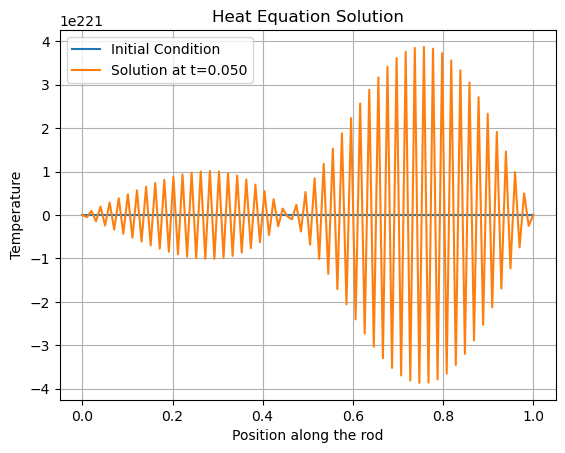

In [16]:
if __name__ == '__main__':
    # test_Lorenz()
    # test_pendulum()
    # test_Rotation()
    #test_lotka_volterra()
    test_heat_equation()

    # """ Small skript to visualize a function class and check if integrals are computed correctly """
    # f = BrokenPolynomial()
    # x = np.linspace(-1, 1, 1000)
    #
    # for i in range(10):
    #     f.reset()
    #     plt.plot(x, [f(num) for num in x])
    #     print(f.integral(-1, 1))
    #     print(quad(f, -1, 1)[0])
    #     print()
    #
    # plt.show()